In [1]:
import Mapping_Functions as mf
import In_Situ_Functions as isf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pims_nd2 import ND2_Reader as nd2_opener
from os.path import join
from ipywidgets import interact
import sys

Function to help manually identify fiducial cells. At least 5 fiducial cells recommended for a 6 well plate well.
Cells from top, bottom, right, left, and center.
Can then be confirmed using the affine transformation function.

[ 752  961 2038]


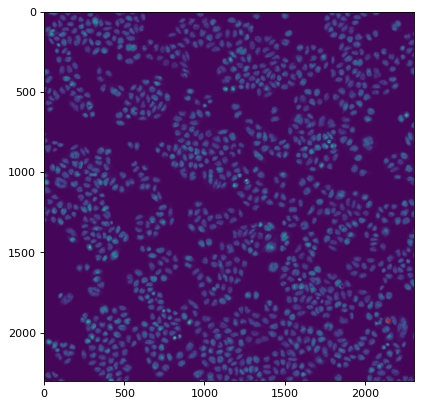

In [85]:
# %matplotlib notebook

path_10X = 'genotyping/cycle_1'
path_40X = 'phenotyping'

M_10X = np.load('M_10X.npy')
M_40X = np.load('M_40X.npy')

well = 1

p = 0

# Points have 2D array, each row is a point, columns are: tile, vertical, horizontal
p_10X = np.array([[49, 1923, 2142]])

T_10X = p_10X[p, 0]; i_10X = p_10X[p, 1]; j_10X = p_10X[p, 2]

# Degrees of freedom: vertical translation, horizonatal translation, angle, vertical scale, horizontal scale
if well == 1:
    DOF = [621.232776, 667.464359, 0.0253159474, 4.00321261, 4.00259586]

# Transformation function from low mag to high mag
P_10X = mf.Local_to_Global([[T_10X, i_10X, j_10X]], M_10X, [2304, 2304])
P_40X = mf.model_TRS(P_10X, DOF, angle='degree')
p_40X = mf.Global_to_Local(P_40X, M_40X, [2304, 2304])

p = 0
print(p_40X[p])


T_40X = p_40X[p, 0]
i_40X = p_40X[p, 1]
j_40X = p_40X[p, 2]

img_10X = isf.InSitu.Import_ND2_by_Tile_and_Well(T_10X, well, path_10X)

plt.figure(figsize=(6, 6), dpi=80)
plt.imshow(img_10X[0])
plt.scatter([j_10X], [i_10X], s=3, c='red')
plt.show()

Plot same cell in high mag

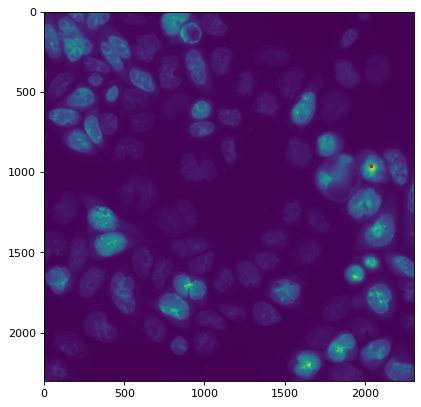

In [86]:
# %matplotlib notebook

img_40X = isf.InSitu.Import_ND2_by_Tile_and_Well(T_40X, well, path_40X)

plt.figure(figsize=(6, 6), dpi=80)
plt.imshow(img_40X[0])
plt.scatter([j_40X], [i_40X], s=3, c='red')
plt.scatter([j_40X], [i_40X], s=3, c='red')
plt.show()